In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def run_PCA(X_train, X_test, n):

    pca = PCA(n_components=n).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    return pca, X_train_pca, X_test_pca

In [ ]:
def run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test):

    lr = LogisticRegression(penalty='l2').fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return cm, cr

In [ ]:
def run_DecisionTreeClassifier(X_train_pca, y_train, X_test_pca, y_test):

    lr = DecisionTreeClassifier().fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return cm, cr

### MNIST

In [ ]:
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### PCA with n=5

**PCA**

In [ ]:
pca, X_train_pca, X_test_pca = run_PCA(X_train, X_test, n=5)

**Logistic Regression**

In [ ]:
cm, cr = run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1201    0    5    2    2  103   24    2   46    2]
 [   0 1501   34    9    1   10    2    5   14    4]
 [  37   56  785   45   52   32  354    5   75    2]
 [  16   37   51  925   13  177    9    9  169   29]
 [   3   18    4    0  892    5   75   64   20  269]
 [  29   82   33  203   12  707   35   84   37    9]
 [  39   54  306    0   66   23  852    2   45    0]
 [  13   69    3    0   85   28    7 1066   52  135]
 [  11   76   60  136   18   82   22   11  886   66]
 [  17   30    1    8  309   26   25  264   48  633]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1387
           1       0.78      0.95      0.86      1580
           2       0.61      0.54      0.58      1443
           3       0.70      0.64      0.67      1435
           4       0.62      0.66      0.64      1350
           5       0.59      0.57      0.58      1231
           6       0.61      0.61      0.61      1387
           7       0.71      0.73      0.72      1458
           8       0.64      0.65      0.64      1368
           9       0.55      0.47      0.50      1361

    accuracy                           0.67     14000
   macro avg       0.67      0.67      0.67     14000
weighted avg       0.67      0.67      0.67     14000



**Decision Tree**

In [ ]:
cm, cr = run_DecisionTreeClassifier(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1175    0   36   16    6   58   35    5   42   14]
 [   0 1458   16   21   10    9   17   21   23    5]
 [  28   12  927   63   31   30  263    6   76    7]
 [  18   23   60  909   13  171   18   18  181   24]
 [   5    5   33   12  745   10   64   98   30  348]
 [  51    7   28  190   17  749   38   36   81   34]
 [  23   21  276   22   75   23  874    9   52   12]
 [   8   27   16   19  107   47    6  984   42  202]
 [  45   31   57  180   28   85   47   32  817   46]
 [  10    9    7   37  347   26   12  193   41  679]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1387
           1       0.92      0.92      0.92      1580
           2       0.64      0.64      0.64      1443
           3       0.62      0.63      0.63      1435
           4       0.54      0.55      0.55      1350
           5       0.62      0.61      0.61      1231
           6       0.64      0.63      0.63      1387
           7       0.70      0.67      0.69      1458
           8       0.59      0.60      0.59      1368
           9       0.50      0.50      0.50      1361

    accuracy                           0.67     14000
   macro avg       0.66      0.66      0.66     14000
weighted avg       0.67      0.67      0.67     14000



#### PCA with n=20

**PCA**

In [ ]:
pca, X_train_pca, X_test_pca = run_PCA(X_train, X_test, n=20)

**Logistic Regression**

In [ ]:
cm, cr = run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1305    0    7    5    4   30   12    3   20    1]
 [   0 1530    8    3    2    7    3    3   23    1]
 [  16   30 1200   33   42    3   39   19   44   17]
 [   8   10   44 1175    1   80    5   34   54   24]
 [   2    5   14    1 1205    3   24   10   11   75]
 [  15   27   12   58   19  979   29   19   56   17]
 [  17    4   27    1   23   25 1279    1   10    0]
 [   7   14   38    4   26    9    0 1292    8   60]
 [   6   56   19   58    6   51   17    4 1119   32]
 [   8   11   17   22   76   24    2   66   23 1112]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1387
           1       0.91      0.97      0.94      1580
           2       0.87      0.83      0.85      1443
           3       0.86      0.82      0.84      1435
           4       0.86      0.89      0.88      1350
           5       0.81      0.80      0.80      1231
           6       0.91      0.92      0.91      1387
           7       0.89      0.89      0.89      1458
           8       0.82      0.82      0.82      1368
           9       0.83      0.82      0.82      1361

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



**Decision Tree**

In [ ]:
cm, cr = run_DecisionTreeClassifier(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[1263    3   11   13    8   28   28    4   19   10]
 [   2 1512    7   10    5    1    8    9   17    9]
 [  19   14 1230   50   22   13   14   25   48    8]
 [  14    9   35 1155   12   68   12   23   80   27]
 [   8    4   15   10 1083   18   32   31   16  133]
 [  20    9   11   70   15  974   32   14   59   27]
 [  31    8   22    6   28   36 1232    7   13    4]
 [   6    5   25   18   30   17    0 1265   18   74]
 [   7   13   33   89   14   57    4   17 1090   44]
 [  10    8   20   21  133   27   13   71   26 1032]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1387
           1       0.95      0.96      0.96      1580
           2       0.87      0.85      0.86      1443
           3       0.80      0.80      0.80      1435
           4       0.80      0.80      0.80      1350
           5       0.79      0.79      0.79      1231
           6       0.90      0.89      0.89      1387
           7       0.86      0.87      0.87      1458
           8       0.79      0.80      0.79      1368
           9       0.75      0.76      0.76      1361

    accuracy                           0.85     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.85      0.85      0.85     14000



### Spambase

In [ ]:
cols = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all', 
    'word_freq_3d',  
    'word_freq_our', 
    'word_freq_over',
    'word_freq_remove', 
    'word_freq_internet',
    'word_freq_order',  
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people', 
    'word_freq_report', 
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',  
    'word_freq_you', 
    'word_freq_credit', 
    'word_freq_your',
    'word_freq_font',
    'word_freq_000', 
    'word_freq_money',  
    'word_freq_hp',  
    'word_freq_hpl', 
    'word_freq_george', 
    'word_freq_650', 
    'word_freq_lab', 
    'word_freq_labs',
    'word_freq_telnet', 
    'word_freq_857', 
    'word_freq_data',
    'word_freq_415', 
    'word_freq_85',  
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',  
    'word_freq_pm',  
    'word_freq_direct', 
    'word_freq_cs',  
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',  
    'word_freq_edu', 
    'word_freq_table',  
    'word_freq_conference',
    'char_freq_;',   
    'char_freq_(',   
    'char_freq_[',   
    'char_freq_!',   
    'char_freq_$',   
    'char_freq_#',   
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'type'
]

spam_df = pd.read_csv('/content/drive/MyDrive/UML/HW3/spambase.csv', names=cols)

# Stratified sampling

# Taking 80% data for training
spam_train = spam_df.groupby('type', group_keys=False).apply(lambda x: x.sample(frac=0.8))

# Taking remaining 20% for testing
spam_test = spam_df.drop(spam_train.index)

# Random shuffling dataframe
spam_train = spam_train.sample(frac=1)
spam_test = spam_test.sample(frac=1)

X_train = spam_train.loc[:, spam_train.columns != 'type']
y_train = spam_train.loc[:, spam_train.columns == 'type']

X_test = spam_test.loc[:, spam_test.columns != 'type']
y_test = spam_test.loc[:, spam_test.columns == 'type']

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#### PCA with n=5

In [ ]:
pca, X_train_pca, X_test_pca = run_PCA(X_train_std, X_test_std, n=5)

In [ ]:
cm, cr = run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[527  31]
 [ 77 286]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.94      0.91       558
           1       0.90      0.79      0.84       363

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921



#### Finding optimum value of components using Cross-Validation

In [ ]:
pca_reg_scores = {}

for n in range(1,10):
    p = PCA(n_components=n)
    X_train_pca = p.fit_transform(X_train_std)
    lr = LogisticRegression(penalty='l2')
    kf = KFold(n_splits=5, random_state=0, shuffle=True)
    scores = cross_val_score(lr, X_train_pca, y_train, cv=kf)
    pca_reg_scores[n] = scores.mean()

In [ ]:
pca_comp = max(pca_reg_scores, key=pca_reg_scores.get)
print('No. of components giving minimum error:', pca_comp)

No. of components giving minimum error: 9


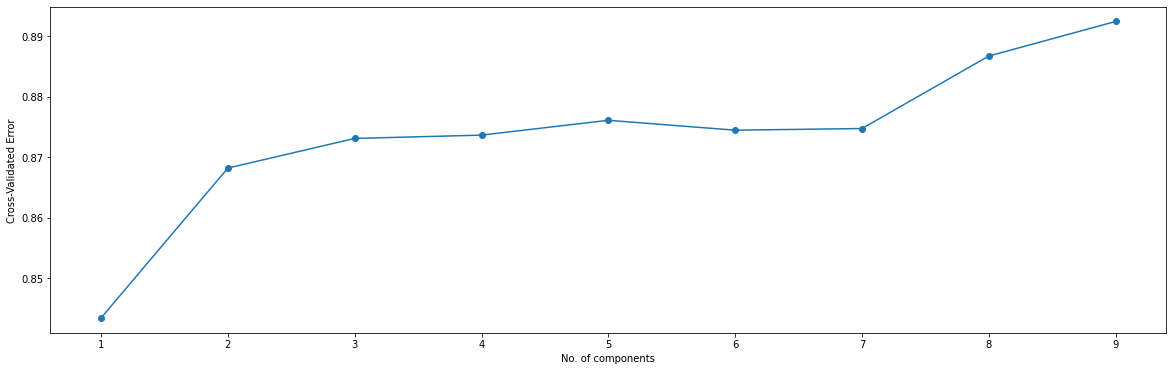

In [ ]:
d_keys = list(pca_reg_scores.keys())
d_values = list(pca_reg_scores.values())
plt.figure(figsize = (20,6))
plt.plot(d_keys, d_values, marker='o')
plt.xlabel('No. of components')
plt.ylabel('Cross-Validated Error')
plt.show()

#### PCA with components obtained above

In [ ]:
pca, X_train_pca, X_test_pca = run_PCA(X_train_std, X_test_std, n=pca_comp)

In [ ]:
cm, cr = run_LogisticRegression(X_train_pca, y_train, X_test_pca, y_test)

In [ ]:
print('Confusion Matrix: \n\n', cm) 

Confusion Matrix: 

 [[533  25]
 [ 70 293]]


In [ ]:
print('Classification Report: \n\n', cr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.96      0.92       558
           1       0.92      0.81      0.86       363

    accuracy                           0.90       921
   macro avg       0.90      0.88      0.89       921
weighted avg       0.90      0.90      0.90       921

